In [141]:
import numpy as np
import tensorflow as tf
import keras.applications
from keras.layers import Dense, Input, Conv2D, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout
from keras.applications.resnet50 import preprocess_input as p_i, decode_predictions, ResNet50
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [142]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [143]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))


In [144]:
X = np.load("/datasets/data/X_1731.npy")#[:393]
y_npy = np.load("/datasets/data/y_1731.npy")#[:393]
ylog = np.log(y_npy)
X.shape

(1731, 224, 224, 3)

In [145]:
np.min(ylog), np.max(ylog)

(0.5306282510621704, 9.300674555657366)

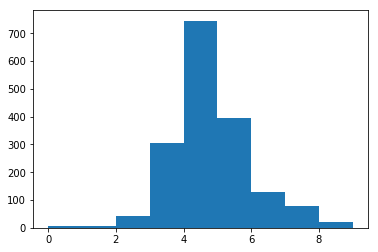

In [146]:
g = plt.hist(ylog, bins = np.linspace(0, 9, 10))
plt.show()

In [147]:
g

(array([  5.,   6.,  44., 306., 745., 395., 128.,  79.,  20.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 9 Patch objects>)

In [148]:
class_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
x = class_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(10, activation= 'softmax')(x)
class_model = Model(inputs = class_model.input, outputs = predictions)


/home/alexkassil/.local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [149]:
y_class = keras.utils.np_utils.to_categorical(np.round(ylog), num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=.2, random_state=42)

In [182]:
adam = Adam(lr=0.000001)
class_model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
class_model.fit(X_train, y_train, epochs = 2, batch_size = 32)


Epoch 1/2
1384/1384 [==============================] - 78s 56ms/step - loss: 0.0056 - acc: 0.9986
Epoch 2/2
1384/1384 [==============================] - 15s 11ms/step - loss: 9.5533e-04 - acc: 1.0000


In [183]:
class_model.fit(X_train, y_train, epochs = 2, batch_size = 32)


Epoch 1/2
1384/1384 [==============================] - 15s 11ms/step - loss: 0.0023 - acc: 0.9993
Epoch 2/2
1384/1384 [==============================] - 15s 11ms/step - loss: 7.4313e-04 - acc: 1.0000


In [184]:
y_pred = class_model.predict(X_test)

In [185]:
np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))

0.7060518731988472

In [186]:
np.argmax(y_pred, axis=1)

array([5, 5, 4, 6, 5, 5, 4, 5, 5, 5, 8, 3, 4, 5, 5, 7, 6, 5, 4, 5, 4, 4,
       4, 5, 6, 4, 5, 7, 7, 4, 8, 4, 7, 5, 5, 4, 4, 4, 5, 4, 5, 4, 4, 4,
       9, 2, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 3, 4, 4, 5, 5, 5, 4, 4, 4,
       5, 5, 4, 4, 5, 8, 6, 5, 9, 4, 6, 4, 3, 5, 4, 4, 5, 4, 5, 7, 5, 4,
       5, 5, 4, 5, 5, 5, 8, 2, 5, 4, 3, 4, 5, 5, 4, 5, 5, 6, 4, 5, 4, 6,
       4, 5, 8, 4, 4, 5, 4, 4, 5, 5, 4, 5, 6, 5, 6, 5, 5, 5, 4, 8, 5, 3,
       5, 4, 5, 5, 5, 8, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4,
       5, 5, 6, 7, 4, 4, 5, 4, 5, 7, 6, 5, 7, 5, 5, 3, 4, 7, 3, 5, 4, 6,
       5, 4, 4, 5, 6, 6, 5, 4, 4, 5, 7, 6, 4, 5, 5, 8, 5, 5, 4, 4, 5, 4,
       4, 6, 5, 5, 8, 5, 5, 7, 5, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4,
       5, 8, 6, 6, 6, 5, 4, 3, 6, 3, 5, 6, 4, 8, 6, 4, 2, 5, 5, 5, 4, 4,
       7, 5, 5, 6, 5, 6, 4, 5, 7, 5, 4, 5, 4, 4, 4, 6, 8, 4, 5, 4, 6, 6,
       3, 6, 3, 4, 7, 4, 5, 5, 4, 4, 4, 7, 4, 5, 5, 4, 4, 4, 4, 5, 7, 4,
       4, 5, 5, 5, 3, 7, 4, 5, 4, 4, 6, 4, 5, 4, 5,

In [178]:
np.argmax(y_test, axis=1)

array([5, 6, 4, 6, 6, 5, 4, 5, 5, 4, 8, 3, 4, 5, 5, 7, 7, 5, 5, 5, 4, 4,
       5, 5, 6, 5, 6, 7, 8, 4, 8, 4, 7, 5, 4, 4, 3, 4, 5, 5, 6, 5, 4, 4,
       8, 3, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 5, 3, 4, 4, 5, 5, 5, 5, 3, 4,
       5, 6, 4, 5, 3, 8, 6, 5, 9, 3, 5, 4, 3, 5, 3, 3, 5, 4, 5, 6, 5, 4,
       5, 5, 5, 4, 5, 5, 6, 4, 6, 5, 5, 4, 6, 5, 5, 5, 5, 5, 5, 6, 4, 7,
       4, 5, 8, 4, 4, 5, 4, 4, 6, 5, 2, 5, 6, 5, 6, 5, 4, 5, 4, 8, 5, 3,
       4, 4, 5, 6, 5, 8, 5, 4, 5, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4,
       5, 5, 6, 7, 4, 4, 4, 4, 5, 7, 6, 5, 7, 6, 4, 5, 6, 7, 3, 5, 5, 6,
       4, 4, 4, 5, 6, 6, 5, 5, 4, 6, 6, 5, 4, 5, 5, 6, 5, 5, 4, 5, 1, 4,
       4, 6, 5, 5, 7, 5, 5, 7, 5, 5, 5, 5, 4, 4, 5, 4, 4, 4, 7, 5, 5, 5,
       4, 8, 6, 8, 6, 5, 6, 3, 6, 3, 5, 6, 4, 8, 5, 4, 2, 5, 5, 5, 5, 4,
       7, 5, 5, 6, 5, 6, 4, 5, 7, 7, 5, 5, 4, 4, 4, 6, 8, 4, 5, 5, 6, 6,
       4, 6, 3, 4, 7, 4, 5, 4, 4, 4, 4, 6, 4, 5, 4, 4, 5, 4, 4, 5, 9, 4,
       4, 5, 6, 3, 4, 7, 4, 6, 4, 5, 6, 3, 5, 5, 6,

In [179]:
np.argmax(y_test, axis=1) - np.argmax(y_pred, axis=1)

array([ 0,  1,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  1,  1,  1,  0,  0, -1,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,
        0,  1, -2,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  1, -1,  0,  0, -2,  2,  1,  1,  2,  1,  1,  0,
        1,  0,  0, -1,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0, -2,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0, -1,  2,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1, -1,  2,
        2,  0,  0,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  0,  1, -1,
        0,  0,  0,  0, -2,  0,  0,  0,  1, -4,  0,  0,  0,  0,  1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  1, -1,
        0,  0,  2,  0,  0

In [248]:
val = 50
print(np.argmax(y_test, axis=1)[val] - np.argmax(y_pred, axis=1)[val])
np.round(y_pred[val]*100)

0


array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.],
      dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


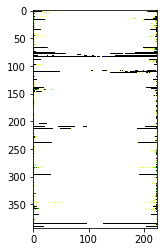

In [173]:
X_224 = np.load("X_224.npy")
plt.imshow(np.var(X_224, axis=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


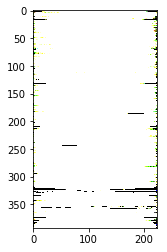

In [131]:
plt.imshow(np.var(X, axis=1))